###### 1. Introduction

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_job`s - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots



Note: You can find the solution [here](https://github.com/dataquestio/solutions/blob/master/Mission146Solutions.ipynb)

In [1]:
# import standard libraries
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [10]:
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,SCHOOL STUDENT COUNSELING,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [11]:
recent_grads[recent_grads['Women'] <1]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0


In [12]:
recent_grads[recent_grads['Unemployed'] <1]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,0,391,0,0.0,42000,30000,78000,452,67,25
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,...,169,740,0,0.0,37000,26000,40000,677,184,56
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.0,35000,18500,44000,355,144,0
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,...,0,504,0,0.0,34000,29000,35000,346,206,111


In [3]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

There some missing values columns like Total, Men, Women,ShareWomen. As this has only one missing value dropping it doesn't effect our visualization as it is not that important. We can also impute the values using any mean,median or any other values as it is numeric. But here, we're going to drop it.Before that let's see what is the single data looks.

In [9]:
recent_grads[recent_grads['Men'].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


Looks like, this single data point have error due unspecified gender in the survey data. For now, there is only one option i.e drop the row. But if there was any possiblilty in correcting the data, we should go to department or people who is repossible and ask possible way to resolve the issue. As we know this is survey data, I believe actual mistake was at the time of data entry. So, for now let's drop the column and move on with our visualization.

In [13]:
recent_grads_clean = recent_grads.dropna(axis='index')

In [14]:
recent_grads_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

###### Pandas, Scatter Plots
Use the plots to explore the following questions:
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

`recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')`

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


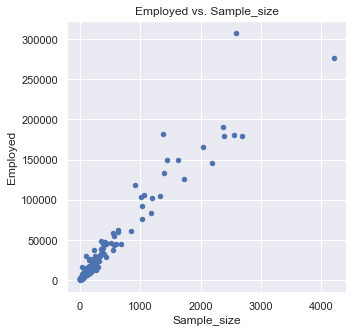

In [18]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', 
                  title='Employed vs. Sample_size', figsize=(5,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Employed vs. Sample_size')

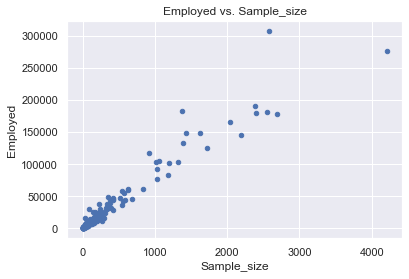

In [17]:
ax = recent_grads.plot(x='Sample_size', y='Employed',
                       kind='scatter')
ax.set_title('Employed vs. Sample_size')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


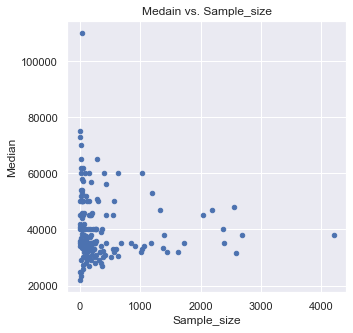

In [21]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', 
                  title='Medain vs. Sample_size',figsize=(5,5))

What can be said from the graph? What relationship does they have.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


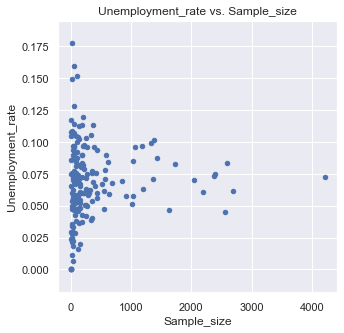

In [23]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate',
                  kind='scatter', 
                  title='Unemployment_rate vs. Sample_size', 
                  figsize=(5,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


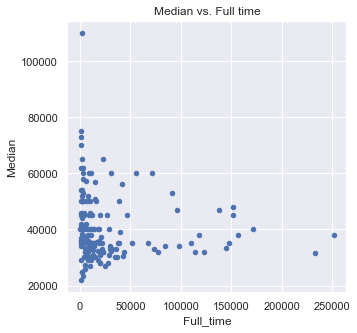

In [25]:
recent_grads.plot(x='Full_time', y='Median',
                  kind='scatter', 
                  title='Median vs. Full time', 
                  figsize=(5,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


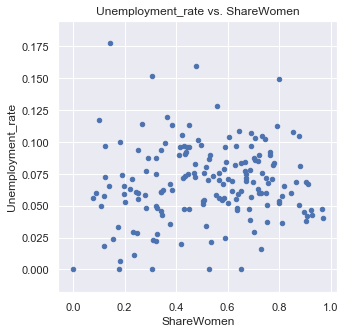

In [26]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate',
                  kind='scatter', 
                  title='Unemployment_rate vs. ShareWomen', 
                  figsize=(5,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


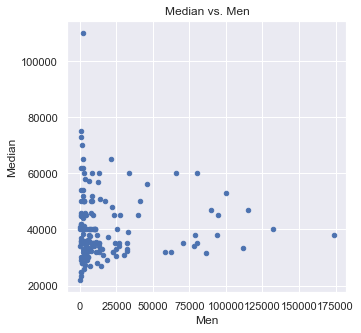

In [27]:
recent_grads.plot(x='Men', y='Median',
                  kind='scatter', 
                  title='Median vs. Men', 
                  figsize=(5,5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


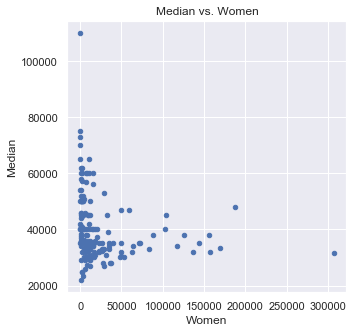

In [28]:
recent_grads.plot(x='Women', y='Median',
                  kind='scatter', 
                  title='Median vs. Women', 
                  figsize=(5,5))

??? How do you interpret these scatter plots???

Do students in more popular majors make more money?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


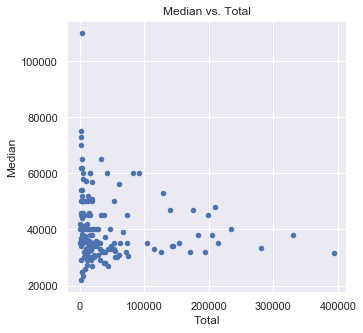

In [33]:
recent_grads_clean.plot(x='Total', y='Median',
                  kind='scatter', 
                  title='Median vs. Total', 
                  figsize=(5,5))

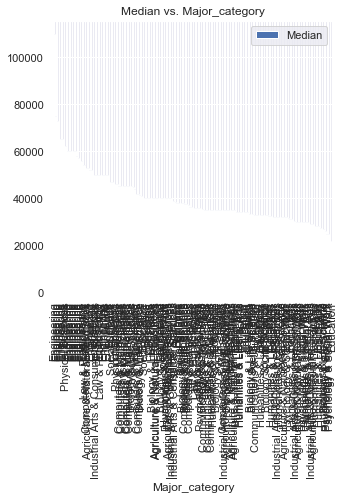

In [32]:
recent_grads.plot(x='Major_category', y='Median',
                  kind='bar', 
                  title='Median vs. Major_category', 
                  figsize=(5,5))

In [41]:
recent_grads_clean[['Major_category','Median']].sort_values('Median',
                                            ascending=False).head(10)

,Major_category,Median
0,Engineering,110000
1,Engineering,75000
2,Engineering,73000
3,Engineering,70000
4,Engineering,65000
5,Engineering,65000
6,Business,62000
7,Physical Sciences,62000
10,Engineering,60000
13,Engineering,60000


In [94]:
major_group = recent_grads_clean.groupby(['Major_category']).median()
major_group.sort_values('Median',ascending=False,inplace=True)
major_group.head()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Major_category,,,,,,,,,,,,,,,,,,,
Engineering,17.0,2413.0,4790.0,4419.0,1385.0,0.227118,71.0,4428.0,4175.0,1040.0,3413.0,400.0,0.059824,57000.0,40000.0,67000.0,2446.0,2121.0,372.0
Computers & Mathematics,48.0,2106.0,8066.0,6607.0,2908.0,0.269194,103.0,6509.0,6289.0,1468.0,4936.0,721.0,0.090823,45000.0,30000.0,60000.0,2593.0,3244.0,357.0
Business,58.0,6206.0,25894.0,13496.0,18313.0,0.441356,278.0,20760.0,18550.0,4890.0,15446.0,2092.0,0.069749,40000.0,30000.0,55000.0,3383.0,9629.0,3046.0
Physical Sciences,74.0,5004.5,3230.5,1819.0,1627.0,0.520427,34.0,2604.5,2295.0,944.0,1878.0,118.0,0.051098,39500.0,29000.0,50000.0,1390.0,1396.0,253.0
Social Science,80.0,5504.0,19879.0,10345.0,9848.0,0.543405,214.0,16181.0,13616.0,5563.0,10548.0,1799.0,0.097244,38000.0,28000.0,50000.0,5350.0,9570.0,1905.0


In [56]:
list(major_group.index.values)

['Agriculture & Natural Resources',
 'Arts',
 'Biology & Life Science',
 'Business',
 'Communications & Journalism',
 'Computers & Mathematics',
 'Education',
 'Engineering',
 'Health',
 'Humanities & Liberal Arts',
 'Industrial Arts & Consumer Services',
 'Interdisciplinary',
 'Law & Public Policy',
 'Physical Sciences',
 'Psychology & Social Work',
 'Social Science']

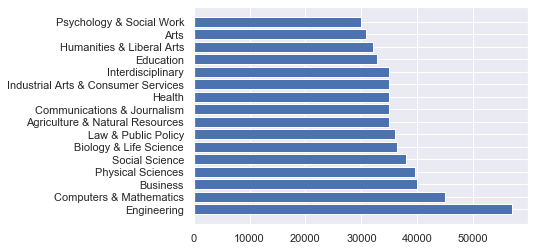

In [95]:
x = major_group.index.values
y = major_group['Median']

plt.barh(x,y)
plt.show()

In [64]:
recent_grads_clean[recent_grads_clean['Major_category'] == 'Social Science']

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
36,37,5501,ECONOMICS,139247.0,89749.0,49498.0,Social Science,0.355469,1322,104117,...,25325,70740,11452,0.099092,47000,35000,65000,25582,37057,10653
56,57,5505,INTERNATIONAL RELATIONS,28187.0,10345.0,17842.0,Social Science,0.632987,219,21190,...,5563,13583,2271,0.096799,40100,31200,53000,6774,9570,2499
68,69,5599,MISCELLANEOUS SOCIAL SCIENCES,3283.0,1499.0,1784.0,Social Science,0.543405,28,2727,...,907,1530,215,0.073080,40000,30000,54000,744,1654,573
78,79,5506,POLITICAL SCIENCE AND GOVERNMENT,182621.0,93880.0,88741.0,Social Science,0.485930,1387,133454,...,43711,83236,15022,0.101175,38000,28000,50000,36854,66947,19803
79,80,5504,GEOGRAPHY,18480.0,11404.0,7076.0,Social Science,0.382900,179,14057,...,5651,8628,1799,0.113459,38000,30000,50000,5350,6830,1905
102,103,5503,CRIMINOLOGY,19879.0,10031.0,9848.0,Social Science,0.495397,214,16181,...,4543,10548,1743,0.097244,35000,25000,45000,3373,10605,1895
124,125,5507,SOCIOLOGY,115433.0,32510.0,82923.0,Social Science,0.718365,1024,92721,...,29639,56561,8608,0.084951,33000,25000,44000,29051,48899,13748
131,132,4007,INTERDISCIPLINARY SOCIAL SCIENCES,9916.0,2337.0,7579.0,Social Science,0.764320,95,7444,...,2834,4714,757,0.092306,33000,24000,40000,2630,3906,1470
142,143,5500,GENERAL SOCIAL SCIENCES,12920.0,5079.0,7841.0,Social Science,0.606889,113,9602,...,3396,5679,1108,0.103455,32000,27000,50000,3602,4778,1634


In [79]:
type(major_total)

pandas.core.frame.DataFrame

In [91]:
major_total = recent_grads_clean.groupby(['Major_category']).sum()
major_total.sort_values('Total',ascending=False,inplace=True)

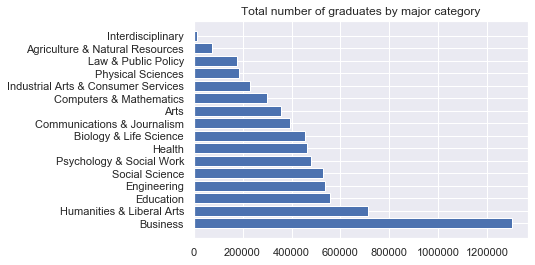

In [93]:
x = major_total.index.values
y = major_total['Total']

plt.barh(x,y)
plt.title('Total number of graduates by major category')
plt.show()

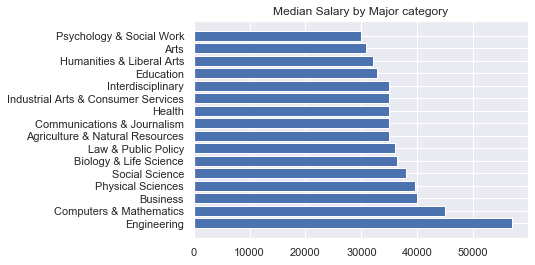

In [149]:
x = major_group.index.values
y = major_group['Median']

plt.title('Median Salary by Major category')

plt.barh(x,y)
plt.show()

Do students in more popular majors make more money?

From above two bargraph we're clear that this is not the case. Eventhough, more students have degree in business, median pay of Engineering graduate is highest compared to other majors. Business graduate median is approx. close to Physical Sciences graduates which is fourth from the last in case of popularity. 

Similary, Humanities & Liberal Arts which is second place in popularity landed on third from last in the median pay for graudate students.

Assumptions: Popularity here is defined as more number of students.

**Do students that majored in subjects that were majority female make more money?**

In [97]:
# take data where there are majority female students

# create bool masking
bool_female_greater = (major_total['Women'] > major_total['Men'])
major_group_female =major_total[bool_female_greater]
major_group_female

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Major_category,,,,,,,,,,,,,,,,,,,
Humanities & Liberal Arts,2026,60729,713468.0,272846.0,440622.0,9.476856,5340,544118,416939,214030,295561,51101,1.215114,478700,352400,631100,192650,276532,94240
Education,2086,38203,559129.0,103526.0,455603.0,11.976120,4742,479839,398059,120593,288031,24969,0.827232,517600,425450,617000,338713,121761,40870
Social Science,825,48132,529966.0,256834.0,273132.0,4.985662,4581,401493,347141,121569,255219,42975,0.861559,336100,255200,451000,113960,190246,54180
Psychology & Social Work,1287,47323,481007.0,98115.0,382892.0,7.149573,3180,380344,289000,137992,218105,33292,0.648583,270900,228000,349000,164305,169366,56246
Health,1158,71255,463230.0,75517.0,387713.0,9.541823,3914,372147,294819,114592,228418,22213,0.791042,441900,314000,603000,245441,110496,31270
Biology & Life Science,1335,48662,453862.0,184919.0,268943.0,8.220700,2317,302797,240377,116736,165802,22854,0.852849,509900,372600,645200,151233,127182,42742
Communications & Journalism,416,7610,392601.0,131921.0,260680.0,2.633536,4508,330660,273330,89817,214228,26852,0.302151,138000,105000,179900,86556,172992,49595
Arts,1049,48121,357130.0,134390.0,222740.0,4.829264,3260,288114,207773,114791,153111,28228,0.721382,264500,175700,349300,94785,163720,60116
Industrial Arts & Consumer Services,736,30207,229792.0,103781.0,126011.0,2.446662,2165,189043,151383,61122,114179,11526,0.336499,254400,187400,316000,57200,104620,26590


In [135]:
# taking only female greater index
female_greater_index = major_group_female.index.values

# create bool masking for above index
female_bool = [True if x in female_greater_index else False 
                      for x in major_group.index.values]
other_bool = [ not x for x in female_bool]
# using the boolean masking in major_group
major_female_great = major_group[female_bool]

other = major_group[other_bool]

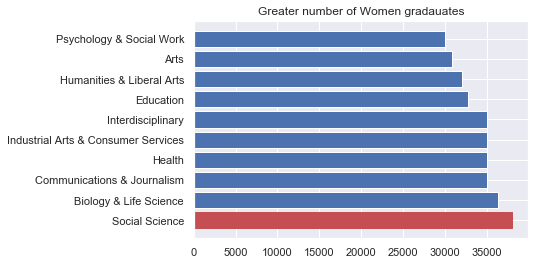

In [108]:
x = major_female_great.index.values
y = major_female_great['Median']

barlist=plt.barh(x,y)
barlist[0].set_color('r')
plt.title('Greater number of Women gradauates')
plt.show()

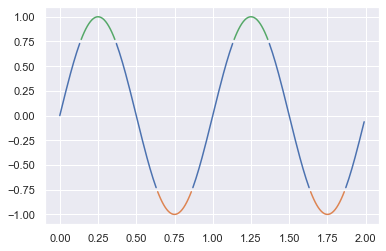

In [114]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

upper = 0.77
lower = -0.77

supper = np.ma.masked_where(s < upper, s)
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where((s < lower) | (s > upper), s)

fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()

**Do students that majored in subjects that were majority female make more money?**

- change the color where female graudates are more

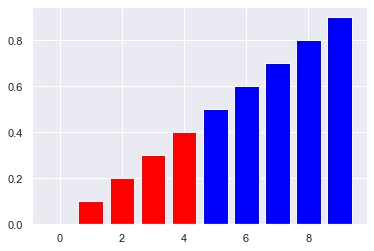

In [127]:
x = np.arange(10)
y = np.arange(10) * 0.1

mask1 = y < 0.5
mask2 = y >= 0.5

plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2], y[mask2], color = 'blue')
plt.show()

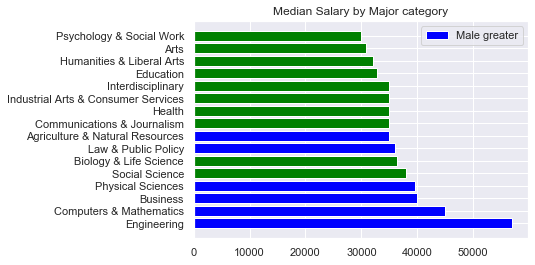

In [157]:
# plotting graph differentiating female greate values

# legend
legends=['Male greater']

for x in major_group.index.values:
    if x in female_greater_index:
        plt.barh(x,major_group.loc[x,'Median'],color='green')
    else:
        plt.barh(x,major_group.loc[x,'Median'],color='blue')

plt.legend(legends)
plt.title('Median Salary by Major category')
plt.show()

**Do students that majored in subjects that were majority female make more money?**

From the graph, majority of subjects where there is female dominance in the number doesn't necessarily earn more money. But they seem to earn less money than male dominance major category.

**Is there any link between the number of full-time employees and median salary?**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


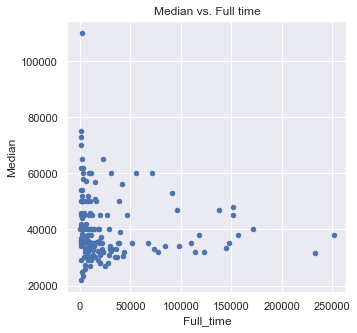

In [158]:
recent_grads_clean.plot(x='Full_time', y='Median',
                  kind='scatter', 
                  title='Median vs. Full time', 
                  figsize=(5,5))

From the graph above, there is no linear relationship between Median and Full time.

###### 3. Pandas, Histograms
`recent_grads['Sample_size'].plot(kind='hist')`

Use the plots to explore the following questions:
- What percent of majors are predominantly male? Predominantly female?
- What's the most common median salary range?

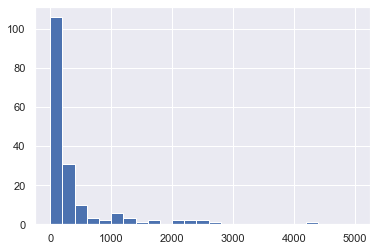

In [161]:
recent_grads_clean['Sample_size'].hist(bins=25, range=(0,5000))

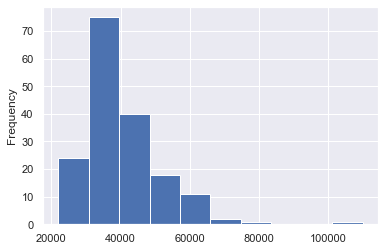

In [166]:
recent_grads_clean['Median'].plot(kind='hist')

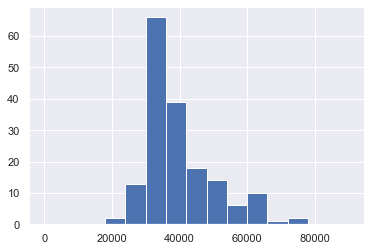

In [200]:
recent_grads_clean['Median'].hist(bins=15, range=(0,90000))

What's the most common median salary range?
- approx 30-35

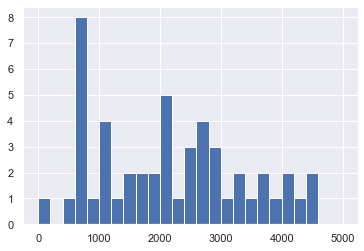

In [178]:
recent_grads_clean['Employed'].hist(bins=25, range=(0,5000))

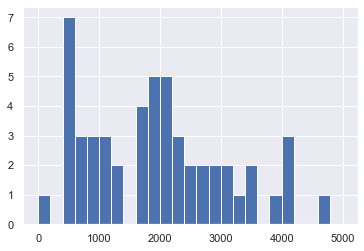

In [179]:
recent_grads_clean['Full_time'].hist(bins=25, range=(0,5000))

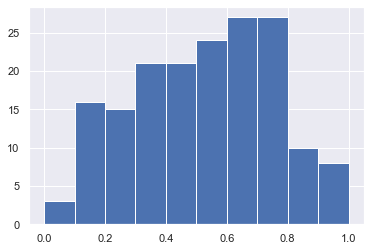

In [204]:
recent_grads_clean['ShareWomen'].hist(bins=10, range=(0,1))

In [203]:
recent_grads['ShareWomen'].value_counts(bins=10).sort_index()

(-0.0019690000000000003, 0.0969]     3
(0.0969, 0.194]                     14
(0.194, 0.291]                      16
(0.291, 0.388]                      22
(0.388, 0.484]                      19
(0.484, 0.581]                      21
(0.581, 0.678]                      25
(0.678, 0.775]                      29
(0.775, 0.872]                      11
(0.872, 0.969]                      12
Name: ShareWomen, dtype: int64

Compare this to the histogram, and we can see that that we are finding out how many of the 172 majors listed have a certain percentage of women. For example, according to the list of intervals, about 25 of the 172 majors consist of 58-68% women.

**What percent of majors are predominantly male? Predominantly female?**

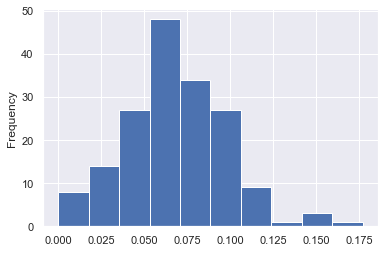

In [185]:
recent_grads_clean['Unemployment_rate'].plot(kind='hist')

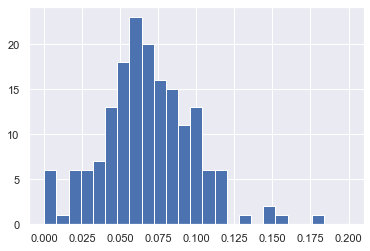

In [188]:
recent_grads_clean['Unemployment_rate'].hist(bins=25, range=(0,0.2))

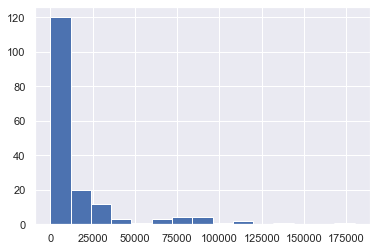

In [201]:
recent_grads_clean['Men'].hist(bins=15, range=(0,180000))

In [208]:
recent_grads_clean['Men'].value_counts(bins=10).sort_index()

(-54.690999999999995, 17488.0]    132
(17488.0, 34857.0]                 20
(34857.0, 52226.0]                  3
(52226.0, 69595.0]                  3
(69595.0, 86964.0]                  6
(86964.0, 104333.0]                 4
(104333.0, 121702.0]                2
(121702.0, 139071.0]                1
(139071.0, 156440.0]                0
(156440.0, 173809.0]                1
Name: Men, dtype: int64

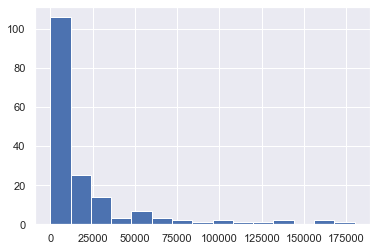

In [202]:
recent_grads_clean['Women'].hist(bins=15, range=(0,180000))

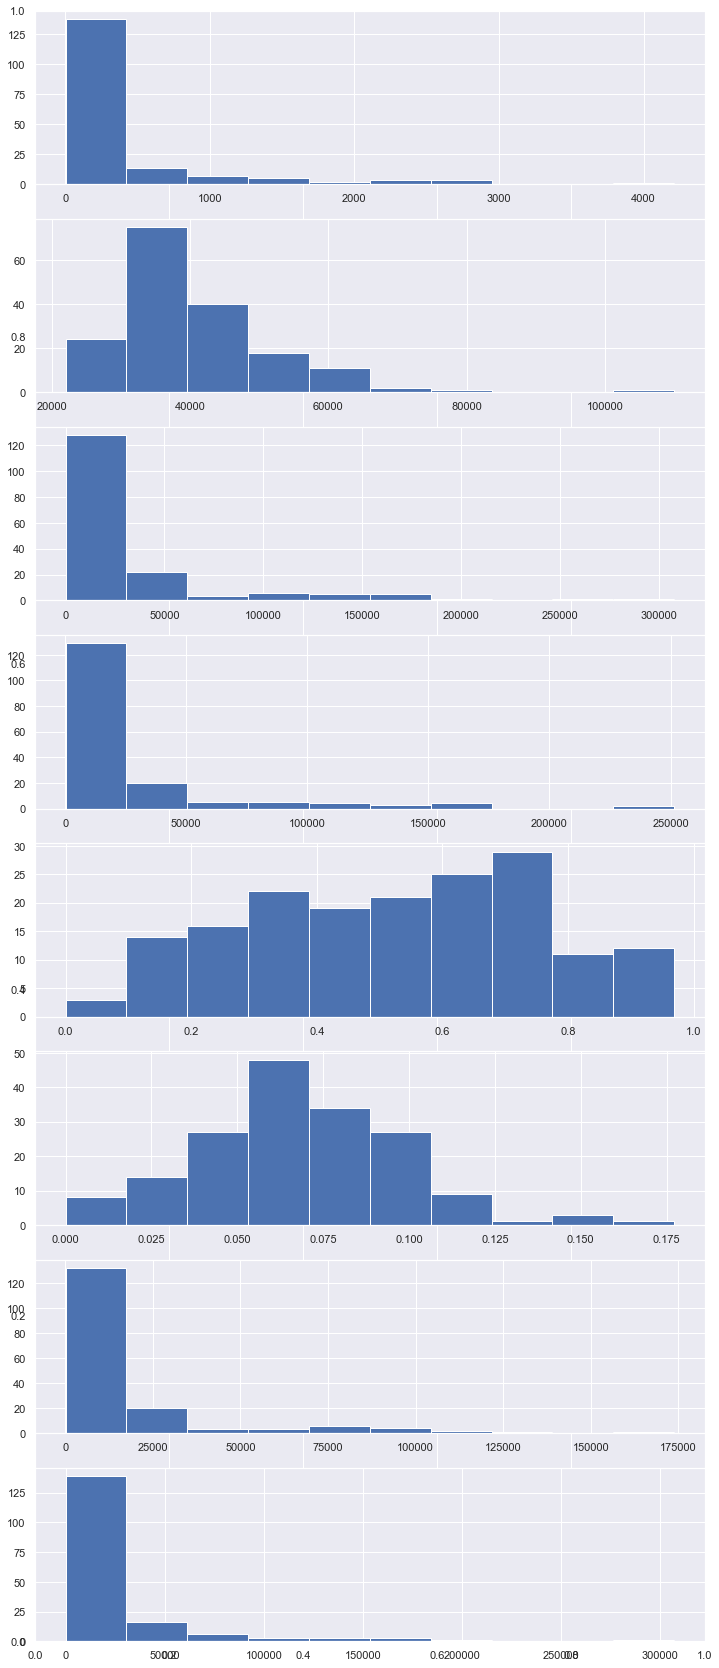

In [206]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

fig, ax = plt.subplots(figsize=(12,30))

for i in range(len(cols)):
    ax = fig.add_subplot(8,1,i+1)
    ax = recent_grads_clean[cols[i]].hist(bins=10)

###### 4. Pandas, Scatter Matrix Plot 

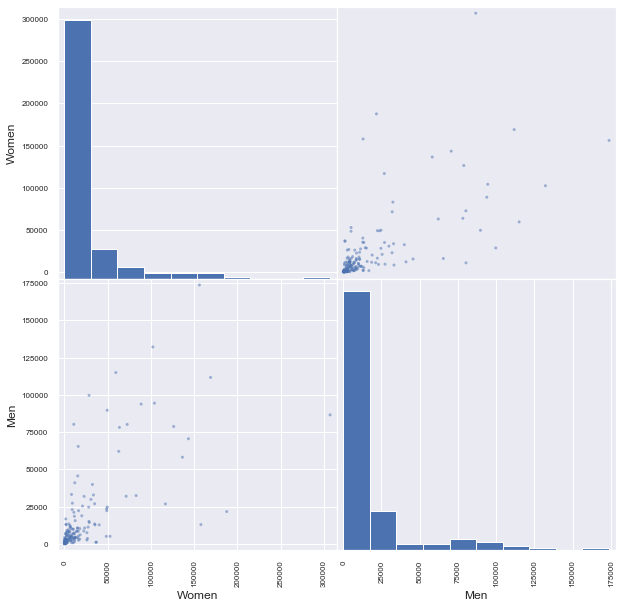

In [211]:
pd.plotting.scatter_matrix(recent_grads[['Women', 'Men']], 
                           figsize=(10,10))

plt.show()

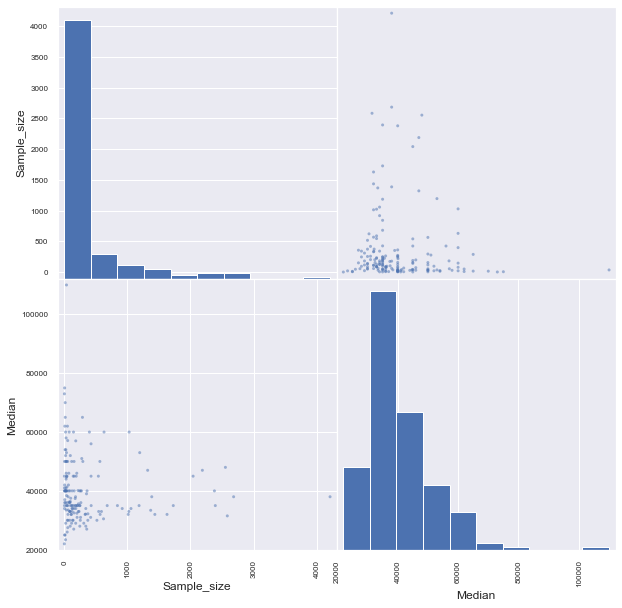

In [213]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']],
               figsize=(10,10))
plt.show()

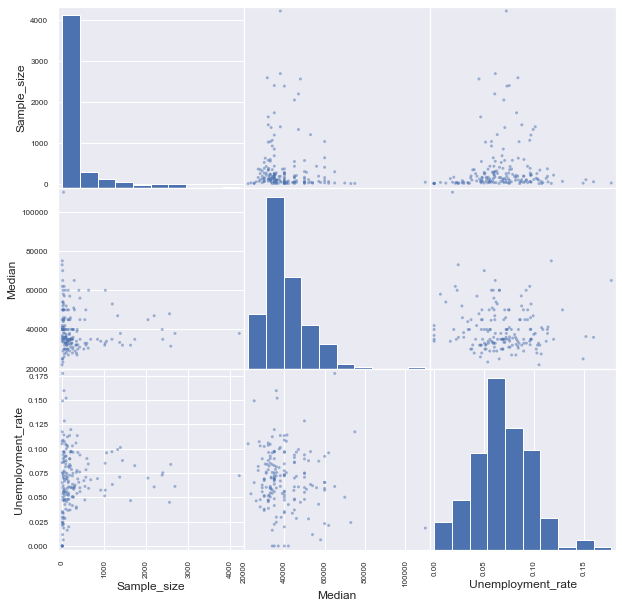

In [214]:
scatter_matrix(recent_grads[['Sample_size', 'Median',
                             'Unemployment_rate']],figsize=(10,10))
plt.show()

**Explore the questions from the last few steps using these scatter matrix plots. You may need to create more scatter matrix plots.**

###### 5. Pandas, Bar plots

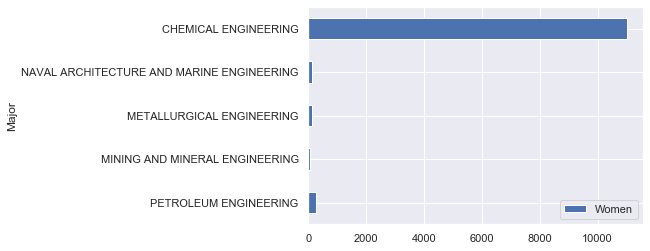

In [216]:
recent_grads[:5].plot.barh(x='Major', y='Women')

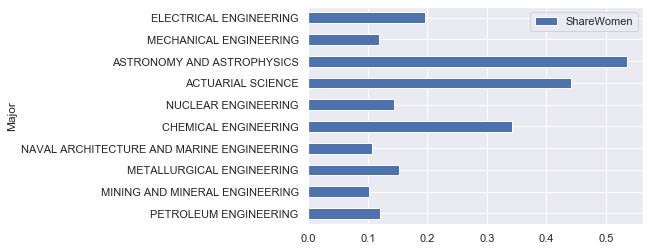

In [217]:
# looking first ten rows
recent_grads[:10].plot.barh(x='Major', y='ShareWomen')

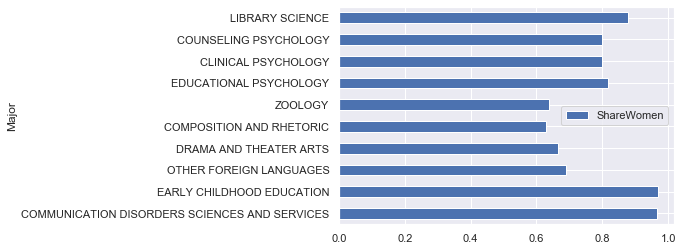

In [218]:
# looking last ten rows
recent_grads[-10:].plot.barh(x='Major', y='ShareWomen')

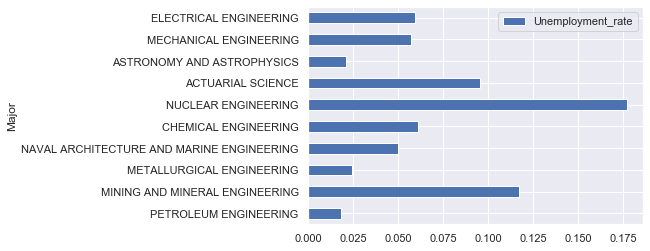

In [219]:
# looking first ten rows
recent_grads[:10].plot.barh(x='Major', 
                            y='Unemployment_rate')

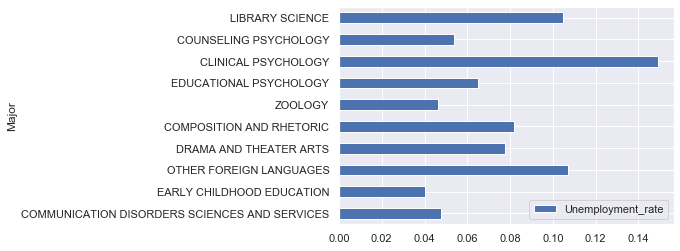

In [220]:
# looking first ten rows
recent_grads[-10:].plot.barh(x='Major', 
                            y='Unemployment_rate')

In [223]:
# taking average employment rate
group_unemployed_rate = recent_grads_clean.groupby(
                        'Major_category').mean()

Major_category
Agriculture & Natural Resources        0.051817
Arts                                   0.090173
Biology & Life Science                 0.060918
Business                               0.071064
Communications & Journalism            0.075538
Computers & Mathematics                0.084256
Education                              0.051702
Engineering                            0.063334
Health                                 0.065920
Humanities & Liberal Arts              0.081008
Industrial Arts & Consumer Services    0.048071
Interdisciplinary                      0.070861
Law & Public Policy                    0.090805
Physical Sciences                      0.046511
Psychology & Social Work               0.072065
Social Science                         0.095729
Name: Unemployment_rate, dtype: float64


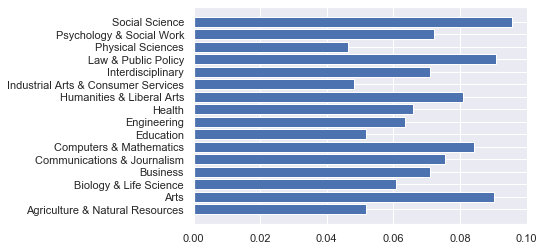

In [227]:
indexes = group_unemployed_rate.index.values
y_values = group_unemployed_rate['Unemployment_rate']

print(y_values)
plt.barh(indexes,y_values)
plt.show()

Major_category
Engineering                            0.059824
Computers & Mathematics                0.090823
Business                               0.069749
Physical Sciences                      0.051098
Social Science                         0.097244
Biology & Life Science                 0.067969
Law & Public Policy                    0.082452
Agriculture & Natural Resources        0.050862
Communications & Journalism            0.072177
Health                                 0.064261
Industrial Arts & Consumer Services    0.055677
Interdisciplinary                      0.070861
Education                              0.048785
Humanities & Liberal Arts              0.081742
Arts                                   0.089464
Psychology & Social Work               0.065112
Name: Unemployment_rate, dtype: float64


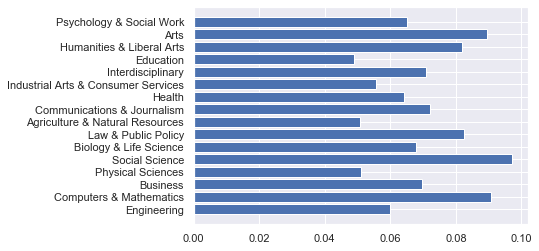

In [226]:
indexes = major_group.index.values
y_values = major_group['Unemployment_rate']

print(y_values)
plt.barh(indexes,y_values)
plt.show()

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.